# Librairies

In [1]:
import project_functions as pf
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
sns.set(rc={"figure.figsize":(15, 6)},style="whitegrid")

# Portfolio

Importons les données :

In [2]:
# récupérons les données des prix sauvegardés dans le fichier prices.csv
datas = pd.read_csv('datas/prices.csv', sep=',')

# On récupère les tickers stockés dans le fichier tickers.txt
tickers = pf.get_tickers('datas/tickers.txt')

In [3]:
# Uniquement les prix liées aux tickers
prices = datas[["Date"]+tickers]

# On transforme la colonne Date en index
prices.set_index("Date", inplace=True)
prices.index = pd.to_datetime(prices.index)

prices.head()

,BESI.AS,ASML.AS,ASM.AS,REN.AS,AMG.AS,WKL.AS,SHELL.AS,RAND.AS,TWEKA.AS,AALB.AS
Date,,,,,,,,,,
2010-01-04,0.830604,27.659260,11.537248,3.762785,8.194963,10.764404,10.527839,20.259628,9.511971,8.183498
2010-01-05,0.846276,27.710567,11.630810,3.721653,8.169353,10.760955,10.598575,20.558300,9.702948,8.148955
2010-01-06,0.830604,28.007000,11.788899,3.700648,8.080161,10.733355,10.522962,20.655998,9.746504,8.310164
2010-01-07,0.836873,27.493944,11.511437,3.646388,8.124315,10.726455,10.491251,21.258936,9.602434,8.267944
2010-01-08,0.852545,26.570450,11.927629,3.679208,8.106654,10.691954,10.430267,21.099819,9.629237,8.283298


Calculons les returns journaliers :

In [4]:
returns = pf.daily_asset_return(prices)

returns.head()

,BESI.AS,ASML.AS,ASM.AS,REN.AS,AMG.AS,WKL.AS,SHELL.AS,RAND.AS,TWEKA.AS,AALB.AS
Date,,,,,,,,,,
2010-01-05,0.018868,0.001855,0.008110,-0.010931,-0.003125,-0.000320,0.006719,0.014742,0.020078,-0.004221
2010-01-06,-0.018518,0.010697,0.013592,-0.005644,-0.010918,-0.002565,-0.007134,0.004752,0.004489,0.019783
2010-01-07,0.007547,-0.018319,-0.023536,-0.014662,0.005465,-0.000643,-0.003013,0.029189,-0.014782,-0.005081
2010-01-08,0.018726,-0.033589,0.036155,0.009001,-0.002174,-0.003216,-0.005813,-0.007485,0.002791,0.001857
2010-01-11,-0.003676,-0.037546,-0.029213,-0.006898,0.020697,-0.008067,0.003275,0.004498,0.026444,0.014829


Nous devons définir une période d'entrainement et de test :
* la période d'entrainement est entre la première date disponible et le 1er Janvier 2015
* la période de test est entre la fin de l'entrainement et la dernière date disponible 

In [5]:
begin_train = returns.index[0]
end_train = "2017-01-01"
begin_test = end_train
end_test = returns.index[-1]

Il est nécessaire de séparer les données entre la phase d'entrainement et la phase de test.

In [6]:
returns_train, returns_test = pf.seperate_df(returns, begin_train, end_train, begin_test, end_test)

Nous pouvons déterminer les returns annualisés année grâce à la ligne de code suivante :

In [7]:
annu_returns_train = pf.annualy_asset_return(returns_train)

## Mean-Variance Portfolio

Let's compute the covariance matrix of the returns.

In [8]:
cov_matrix_train = returns_train.cov()

In [9]:
w1,r,v = pf.gmv_portfolio(returns_train,cov_matrix_train,show=True)

The portfolio return is: 17.23 %
The portfolio volatility is: 16.02 %


In [10]:
w,r,vol = pf.opt_mean_variance(returns_train,cov_matrix_train,obj_rend=0.1,risk_free=0.02624,show=True)

The portfolio return is: 10.0 %
The portfolio volatility is: 5.02 %


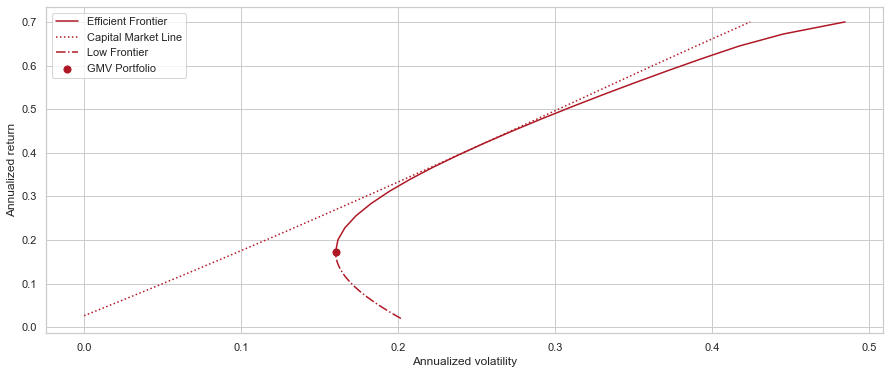

In [11]:
# plot the efficient frontier
eff, eff_rf = pf.efficient_frontier(returns_train,cov_matrix_train,min=0.02,max=0.7,number=20,risk_free=0.02624,plot=True)

Calculons le return du portfolio avec les poids souhaités sur la période de test :

In [12]:
prf = w["Risk Free"]
del w["Risk Free"]
rendements = pd.Series((returns_test*w).sum(axis=1),name="Portfolio")
rendement = pf.annualy_asset_return(rendements)
rendement += prf*0.02624
print("The portfolio return is:",round(rendement*100,2),"%")

The portfolio return is: 6.48 %


In [13]:
w

{'BESI.AS': 0.101,
 'ASML.AS': 0.029,
 'ASM.AS': -0.019,
 'REN.AS': 0.149,
 'AMG.AS': -0.024,
 'WKL.AS': -0.002,
 'SHELL.AS': -0.036,
 'RAND.AS': -0.064,
 'TWEKA.AS': 0.041,
 'AALB.AS': 0.029}

In [14]:
vol

0.0502163589971262